In [2]:
from roadvision3d.src.datasets.dair_kitti import DAIR_KITTI
from roadvision3d.src.datasets.dair import DAIR
import yaml

from roadvision3d.src.datasets.kitti_utils import Object3d
import numpy as np

import matplotlib.pyplot as plt
from visualizer import draw_2d_bboxes, draw_3d_bboxes


%load_ext autoreload
%autoreload 2

In [3]:
cfg_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/dair_kitti.yaml'
cfg = yaml.load(open(cfg_path, 'r'), Loader=yaml.Loader)

# train_loader, val_loader, test_loader = build_dataloader(cfg['dataset'])
# dataset = KITTI(split='trainval', cfg=cfg['dataset'])
dataset_kitti = DAIR_KITTI(split='trainval', cfg=cfg['dataset'])

Resolution init: [1920 1088]


In [4]:
cfg_dair = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/dair.yaml'
cfg = yaml.load(open(cfg_dair, 'r'), Loader=yaml.Loader)
dataset_dair = DAIR(split='trainval', cfg=cfg['dataset'])

Resolution init: [1920 1088]


In [5]:
print(dataset_dair.data_dir)
print(dataset_dair.image_dir)
print(dataset_dair.label_dir)
print(dataset_dair.calib_dir)

/home/javier/datasets/DAIR-V2X/single-infrastructure-side
/home/javier/datasets/DAIR-V2X/single-infrastructure-side/image
/home/javier/datasets/DAIR-V2X/single-infrastructure-side/label/virtuallidar
/home/javier/datasets/DAIR-V2X/single-infrastructure-side/calib


In [6]:
id = 441

In [9]:
print(dataset_dair.get_image(id))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7FC5C887D040>


In [7]:
calib_kitti = dataset_kitti.get_calib(id)
print(calib_kitti.C2V)
calib_dair = dataset_dair.get_calib(id)
print(calib_dair.C2V)

[[-2.9850235e-02 -2.2309867e-01  9.7409976e-01 -1.8642342e-01]
 [-9.9614722e-01  2.1225850e-03 -4.1027877e-02 -2.2306733e+00]
 [ 1.4527336e-03 -8.5658842e-01 -1.9081824e-01  5.0930972e+00]]
[[-2.98502348e-02 -2.23098672e-01  9.74099735e-01 -1.86423251e-01]
 [-9.96147223e-01  2.12258492e-03 -4.10278788e-02 -2.23067310e+00]
 [ 1.45273360e-03 -8.56588407e-01 -1.90818235e-01  5.09309711e+00]]


In [8]:
label_kitti = dataset_kitti.get_label(id)
print(label_kitti[1])

label_file_dair = dataset_dair.get_label(id)
print(label_file_dair[1])

def get_objects_from_label(label_file, calib):
    import json
    with open(label_file, 'r') as f:
        data = json.load(f)
    objects = [Object3d.from_dair_json(obj, calib) for obj in data]
    return objects

data = get_objects_from_label(label_file_dair, calib_dair)
print(data[1])

Trafficcone 0.000 0.000 -0.461 box2d: [1820.9099   354.723   1832.6063   388.95825] hwl: [0.959 0.374 0.376] pos: [20.73187  -3.888707 51.28078 ] ry: -0.036
Trafficcone 0.000 0.000 -0.461 box2d: [1820.9099   354.723   1832.6063   388.95825] hwl: [0.959 0.374 0.376] pos: [20.73187  -3.888707 51.28078 ] ry: -0.076


TypeError: unhashable type: 'list'

In [9]:
# Example usage for multiple objects
num_objects = len(data)
num_objects = 30

for i in range(num_objects):
    print('ry_cam: ', data[i].ry)
    print('KITTI cam: ', label_kitti[i].ry)  # Expected alpha in KITTI
    print('\n')

ry_cam:  1.6089588638945567
KITTI cam:  1.638102217916387


ry_cam:  -0.07632600885186709
KITTI cam:  -0.03598679487011358


ry_cam:  1.5742213559400786
KITTI cam:  1.604103627582906


ry_cam:  1.5742219503436705
KITTI cam:  1.6041042090897832


ry_cam:  2.7400513971525697
KITTI cam:  2.772285313850774


ry_cam:  0.007642914501828606
KITTI cam:  0.049905047232592814


ry_cam:  -1.5676923221314016
KITTI cam:  -1.5378030840397585


ry_cam:  1.5742218401454704
KITTI cam:  1.604104101282541


ry_cam:  -1.4576739178131441
KITTI cam:  -1.4300120920012185


ry_cam:  -0.11575173825825076
KITTI cam:  -0.07636298653304152


ry_cam:  -2.5989101342307777
KITTI cam:  -2.5504195564760694


ry_cam:  -1.5346960980874311
KITTI cam:  -1.505509731654604


ry_cam:  -1.6130389111365206
KITTI cam:  -1.5821426279466226


ry_cam:  0.36323706835794645
KITTI cam:  0.41106863279796424


ry_cam:  1.60124385626741
KITTI cam:  1.6305486880652929


ry_cam:  1.5742216805261
KITTI cam:  1.6041039451264165


ry_cam:  0

# Check in images

In [7]:
data_id = 441

img = dataset_dair.get_image(data_id)
labels_path = dataset_dair.get_label(data_id)
labels= get_objects_from_label(labels_path, calib_dair)

calib = dataset_dair.get_calib(data_id)

print(labels)


[Car 1.000 0.000 1.809 box2d: [479.9739  146.91177 528.8052  181.58662] hwl: [1.464 1.834 4.220] pos: [-24.096481 -19.634968 119.1097  ] ry: 1.609, Trafficcone 0.000 0.000 -0.461 box2d: [1820.9099   354.723   1832.6063   388.95825] hwl: [0.959 0.374 0.376] pos: [20.73187  -3.888707 51.28078 ] ry: -0.076, Car 1.000 0.000 1.740 box2d: [552.2036  170.5118  596.38086 205.97374] hwl: [1.545 1.809 4.250] pos: [-17.064781 -16.064486 102.10988 ] ry: 1.574, Car 1.000 0.000 1.828 box2d: [329.05634 207.17874 406.33423 256.93536] hwl: [1.478 1.816 4.351] pos: [-20.566961 -10.777113  79.17852 ] ry: 1.574, Car 1.000 0.000 2.991 box2d: [230.78809 411.7751  538.77295 529.50726] hwl: [1.521 1.862 4.855] pos: [-9.216983   -0.81585383 35.928497  ] ry: 2.740, Car 2.000 0.000 0.024 box2d: [ 759.76373  366.0476  1000.7141   468.71783] hwl: [1.597 1.870 4.230] pos: [-0.6650424 -1.9861151 41.290894 ] ry: 0.008, Car 0.000 0.000 4.489 box2d: [1326.0612  705.7582 1603.7283  933.0269] hwl: [1.587 1.851 4.246] pos

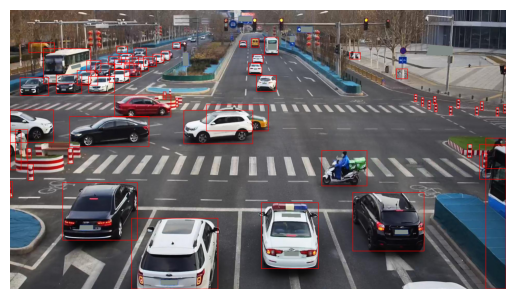

<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7EFE4F169970>


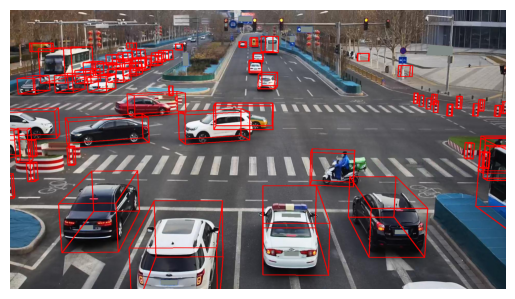

In [8]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, labels)

img_3d = img.copy()
print(img_3d)
draw_3d_bboxes(img_3d, labels, calib, 0.20)

In [99]:
import numpy as np
import math
def get_alpha_from_ry_cam(ry_cam, obj_center_cam):
    """
    Calculates `alpha` in camera coordinates from `ry_cam`, ensuring the range is [-pi/2, 3*pi/2].
    
    Args:
        ry_cam (float): The rotation angle around the Y-axis in camera coordinates.
        obj_center_cam (tuple): The object's center (x, y, z) in camera coordinates.
    
    Returns:
        float: The `alpha` angle in camera coordinates within the range [-pi/2, 3*pi/2].
    """
    x_center, _, z_center = obj_center_cam  # Object center position in the camera frame
    
    # Calculate `alpha` based on `ry_cam` and the object's center position
    alpha_cam = ry_cam - np.arctan2(x_center, z_center)
    
    # Normalize `alpha` to be within [-pi, pi]
    alpha_cam = (alpha_cam + np.pi) % (2 * np.pi) - np.pi

    # Adjust `alpha` to be within [-pi/2, 3*pi/2]
    if alpha_cam < -np.pi / 2:
        alpha_cam += 2 * np.pi
    elif alpha_cam > 3 * np.pi / 2:
        alpha_cam -= 2 * np.pi

    return alpha_cam

def get_alpha_from_ry_cam1(ry_cam, obj_center_cam):

    alpha = ry_cam - math.atan2(obj_center_cam[0], obj_center_cam[2])
    if alpha > np.pi:
        alpha -= 2 * np.pi
    if alpha <= -np.pi:
        alpha += 2 * np.pi

    alpha_tan = math.tan(alpha)
    alpha_arctan = math.atan(alpha_tan)
    if math.cos(alpha) < 0:
        alpha_arctan += np.pi
    alpha_cam = alpha_arctan

    return alpha_cam

# Example usage for multiple objects
num_objects = len(data)
num_objects = 5

for i in range(num_objects):
    ry_cam = label_kitti[i].ry  # Assuming `ry_cam` is provided for each object
    obj_center_cam = data[i].pos  # Assuming object center in the camera frame
    alpha_cam = get_alpha_from_ry_cam(ry_cam, obj_center_cam)
    alpha_cam1 = get_alpha_from_ry_cam1(ry_cam, obj_center_cam)
    print('ry_cam: ', ry_cam)
    print('Computed alpha_cam: ', alpha_cam)
    print('Computed alpha_cam1: ', alpha_cam1)
    print('KITTI alpha: ', label_kitti[i].alpha)  # Expected alpha in KITTI
    print('\n')


ry_cam:  3.0516292684239943
Computed alpha_cam:  2.7738656037015517
Computed alpha_cam1:  2.773865612401546
KITTI alpha:  2.734332467096819


ry_cam:  -1.5476041920412527
Computed alpha_cam:  4.702648192894261
Computed alpha_cam1:  4.7026481945723635
KITTI alpha:  4.670307121793625


ry_cam:  -1.6153129158796464
Computed alpha_cam:  4.3693075102135905
Computed alpha_cam1:  4.369307510769708
KITTI alpha:  4.335286106350193


ry_cam:  0.11974728771422449
Computed alpha_cam:  -0.255619251048822
Computed alpha_cam1:  -0.2556192549547638
KITTI alpha:  -0.30012193677262994


ry_cam:  -0.0015887996383727732
Computed alpha_cam:  -0.3678211948104919
Computed alpha_cam1:  -0.3678212124838199
KITTI alpha:  -0.40954340475172535




In [100]:
def get_ry_cam(object, calib):
    liadr_r = np.matrix(
            [[math.cos(object.ry), -math.sin(object.ry), 0], [math.sin(object.ry), math.cos(object.ry), 0], [0, 0, 1]]
        )
    l, w, h = object.l, object.w, object.h
    corners_3d_lidar = np.matrix(
        [
            [l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2],
            [w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2],
            [0, 0, 0, 0, h, h, h, h],
        ]
    )
    corners_3d_lidar = liadr_r * corners_3d_lidar + np.matrix(object.pos).T
    corners_3d_cam = calib.V2C[:3, :3] * corners_3d_lidar + calib.V2C[:3, 3].reshape(-1, 1)

    x0, z0 = corners_3d_cam[0, 0], corners_3d_cam[2, 0]
    x3, z3 = corners_3d_cam[0, 3], corners_3d_cam[2, 3]
    dx, dz = x0 - x3, z0 - z3
    yaw = math.atan2(-dz, dx)

    return yaw

num_objects = len(data)

for i in range(num_objects):
    ry_cam = get_ry_cam(data[i], calib)
    print('Original: ', data[i].ry)
    print('Transformed: ', ry_cam)
    print('KITTI: ', label_kitti[i].ry)
    print('\n')


Original:  3.0120961200848195
Transformed:  1.6724146407584364
KITTI:  3.0516292684239943


Original:  -1.5799452650632586
Transformed:  -0.032219874239948675
KITTI:  -1.5476041920412527


Original:  -1.6493343141688648
Transformed:  0.03567215995138575
KITTI:  -1.6153129158796464


Original:  0.07524459697474387
Transformed:  -1.6784587183270194
KITTI:  0.11974728771422449


Original:  -0.04331097330672056
Transformed:  -1.5571470347341243
KITTI:  -0.0015887996383727732


Original:  1.544722167566206
Transformed:  3.1259224681549873
KITTI:  1.5774656399593603


Original:  1.5994269329486448
Transformed:  3.072452462187734
KITTI:  1.6308905727508538


Original:  1.4986038256451597
Transformed:  -3.1121340178784624
KITTI:  1.5324684889083802


Original:  1.49161913625668
Transformed:  -3.105294524042082
KITTI:  1.5256563523767652


Original:  1.5815025312893376
Transformed:  3.0899657838775587
KITTI:  1.6133786899191973


Original:  1.5968208624592084
Transformed:  3.074998401732955
KIT

## Exp dair tools

In [101]:
import math
import numpy as np

def get_camera_3d_8points(obj_size, yaw_lidar, center_lidar, center_in_cam, r_velo2cam, t_velo2cam):
    liadr_r = np.matrix(
        [[math.cos(yaw_lidar), -math.sin(yaw_lidar), 0], 
         [math.sin(yaw_lidar), math.cos(yaw_lidar), 0], 
         [0, 0, 1]]
    )
    
    l, w, h = obj_size
    corners_3d_lidar = np.matrix(
        [
            [l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2],
            [w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2],
            [0, 0, 0, 0, h, h, h, h],
        ]
    )

    t_velo2cam = t_velo2cam.reshape(3, 1)

    corners_3d_lidar = liadr_r @ corners_3d_lidar + np.matrix(center_lidar).T
    corners_3d_cam = r_velo2cam @ corners_3d_lidar + t_velo2cam

    x0, z0 = corners_3d_cam[0, 0], corners_3d_cam[2, 0]
    x3, z3 = corners_3d_cam[0, 3], corners_3d_cam[2, 3]
    dx, dz = x0 - x3, z0 - z3
    yaw = math.atan2(-dz, dx)

    # Ensure `center_in_cam` is a 1D array to access scalar components
    center_in_cam = np.asarray(center_in_cam).flatten()

    alpha = yaw - math.atan2(center_in_cam[0], center_in_cam[2])

    # Adjust angle to be within [-pi, pi]
    if alpha > math.pi:
        alpha -= 2.0 * math.pi
    if alpha <= -math.pi:
        alpha += 2.0 * math.pi

    alpha_arctan = normalize_angle(alpha)

    return alpha_arctan, yaw

def normalize_angle(angle):
    # Ensure angle is within [-pi/2, 3pi/2]
    alpha_tan = np.tan(angle)
    alpha_arctan = np.arctan(alpha_tan)
    if np.cos(angle) < 0:
        alpha_arctan += math.pi
    return alpha_arctan


In [102]:
def convert_point(point, matrix):
    return matrix @ point


import json
with open(label_file_dair, 'r') as f:
    labels = json.load(f)

id = 0
label = labels[id]

h = float(label["3d_dimensions"]["h"])
w = float(label["3d_dimensions"]["w"])
l = float(label["3d_dimensions"]["l"])
x = float(label["3d_location"]["x"])
y = float(label["3d_location"]["y"])
z = float(label["3d_location"]["z"])
yaw_lidar = float(label["rotation"])

z = z - h / 2
bottom_center = [x, y, z]
# bottom_center = np.array([x, y, z])
obj_size = [l, w, h]

r_velo2cam, t_velo2cam = calib_dair.V2C[:3, :3], calib_dair.V2C[:3, 3]

Tr_velo_to_cam = calib_dair.V2C

bottom_center_in_cam = r_velo2cam * np.matrix(bottom_center).T + t_velo2cam
# bottom_center_in_cam = r_velo2cam @ bottom_center + t_velo2cam

alpha, yaw = get_camera_3d_8points(
    obj_size, yaw_lidar, bottom_center, bottom_center_in_cam, r_velo2cam, t_velo2cam
)

In [103]:
cam_x, cam_y, cam_z = convert_point(np.array([x, y, z, 1]).T, Tr_velo_to_cam)
print(bottom_center_in_cam)
print(cam_x, cam_y, cam_z)
print(label_kitti[id].pos)

print(alpha, yaw)
print(label_kitti[id].alpha, label_kitti[id].ry)

[[ 15.45390691  23.28043772  19.06071794]
 [-12.5703942   -4.74386338  -8.96358316]
 [ 50.59182431  58.41835513  54.19863535]]
15.45390690610019 -4.743863383912665 54.198635350304585
[15.453907  -4.7438636 54.198635 ]
2.33082097945429 3.012096120084823
2.734332467096819 3.0516292684239943


In [104]:
import numpy as np
import math

def transform_rot_y_lidar_to_camera(rot_y_lidar, calib):
    """
    Transforms the rotation angle `rot_y` from LiDAR to camera coordinates.
    
    Args:
        rot_y_lidar (float): The rotation angle around the Y-axis in LiDAR coordinates.
        calib (object): Calibration object with a V2C (LiDAR-to-camera) matrix.
    
    Returns:
        float: The rotation angle around the Y-axis in camera coordinates.
    """
    # Step 1: Create a unit vector pointing along the direction of `rot_y` in LiDAR coordinates
    direction_lidar = np.array([math.cos(rot_y_lidar), 0, math.sin(rot_y_lidar), 1.0])  # Homogeneous coordinates
    
    # Step 2: Apply the V2C rotation (ignoring translation for direction transformation)
    direction_cam = calib.V2C @ direction_lidar.T  # Transform to camera coordinates
    
    # Step 3: Calculate the angle in the camera frame's X-Z plane
    rot_y_camera = math.atan2(direction_cam[2], direction_cam[0])  # atan2(z, x) gives rotation around Y-axis
    
    return rot_y_camera

rot_y_cam = transform_rot_y_lidar_to_camera(yaw_lidar, calib_dair)

rot_y_cam = -yaw_lidar - np.pi / 2

print(rot_y_cam)

-3.231556038755592
